In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats

Sample from a normal distribution using numpy's random number generator

In [2]:
# Sample from a normal distribution using numpy's random number generator
n_samples = 10000
mu_true, sigma_true = 5, 1 # mean and standard deviation

np.random.seed(0)
samples = np.random.normal(mu_true, sigma_true, size=n_samples)

Calculate Bayesian confidence intervals for the mean, var, and std

In [3]:
confidence_level = 95
res_mean, res_var, res_std = stats.bayes_mvs(samples, alpha=confidence_level/100.)
mu_fit = res_mean.statistic
std_fit = res_std.statistic
print(res_mean)
print(res_var)
print(res_std)

Mean(statistic=4.981566279841734, minmax=(4.962210526778522, 5.0009220329049455))
Variance(statistic=0.9752679753477971, minmax=(0.9482354230117915, 1.0023005276838026))
Std_dev(statistic=0.9875565681761208, minmax=(0.9738699839301516, 1.0012431524220902))


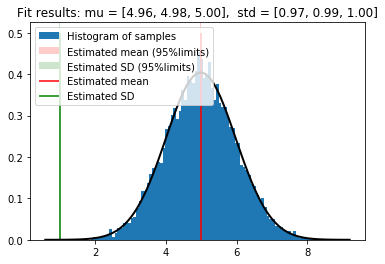

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(samples, bins=100, density=True, label='Histogram of samples')
plt.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
plt.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
            alpha=0.2, label="Estimated mean ("+str(confidence_level)+r'%limits)')
plt.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated SD')
plt.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2,
            label="Estimated SD ("+str(confidence_level)+r'%limits)')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu_fit, std_fit)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = [%.2f, %.2f, %.2f],  std = [%.2f, %.2f, %.2f]" % (res_mean.minmax[0], res_mean.statistic, res_mean.minmax[1], res_std.minmax[0], res_std.statistic, res_std.minmax[1])
plt.title(title)

plt.legend()
plt.show()